In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense

In [ ]:
# Step 1: Load IMDB dataset
max_features = 10000  # Number of words to consider as features
maxlen = 500  # Cut texts after this number of words
batch_size = 32

In [ ]:
# Load the data as lists of integers
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
# Step 2: Preprocess the input data
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

In [ ]:
# Step 3: Define the model with embedding layer and SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))  # Embedding layer
model.add(SimpleRNN(32))  # Simple RNN layer
model.add(Dense(1, activation='sigmoid'))  # Output layer

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Step 4: Train the model
history = model.fit(input_train, y_train, epochs=10, batch_size=batch_size, validation_split=0.2)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 72s 112ms/step - accuracy: 0.6084 - loss: 0.6446 - val_accuracy: 0.8388 - val_loss: 0.3899
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 111ms/step - accuracy: 0.8498 - loss: 0.3608 - val_accuracy: 0.8626 - val_loss: 0.3432
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.8745 - loss: 0.3104 - val_accuracy: 0.8590 - val_loss: 0.3577
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 112ms/step - accuracy: 0.9010 - loss: 0.2534 - val_accuracy: 0.7860 - val_loss: 0.4486
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 111ms/step - accuracy: 0.9191 - loss: 0.2114 - val_accuracy: 0.8148 - val_loss: 0.4160
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 71s 113ms/step - accuracy: 0.9390 - loss: 0.1636 - val_accuracy: 0.8370 - val_loss: 0.3985
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 112ms/step - accuracy: 0.9508 - loss: 0.1372 - val_accuracy: 0.8558 - val_loss: 0.4195
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 84s 115ms/step - accuracy: 0.9639 - loss: 0

In [ ]:
# Step 5: Evaluate the model
test_loss, test_acc = model.evaluate(input_test, y_test)
print('Test Accuracy:', test_acc)

782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.8122 - loss: 0.6140
Test Accuracy: 0.8157600164413452


In [ ]:
# Step 6: Plot the training and validation loss and accuracy
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

In [ ]:
epochs = range(1, len(acc_values) + 1)

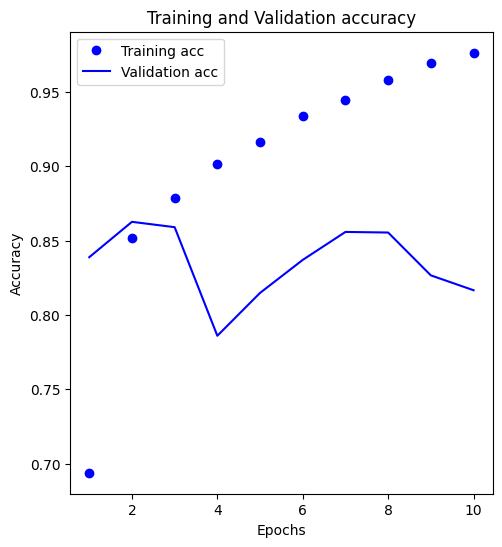

In [ ]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

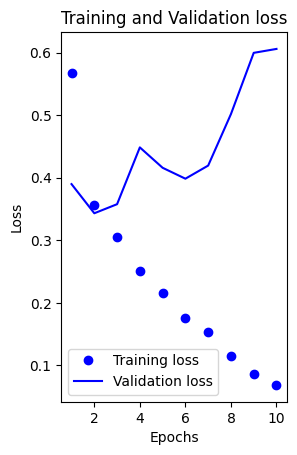

In [ ]:
# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()